## Mining Process and Flotation Plant Database Dataset

::: callout-note
## Overview of the dataset

The main goal is to use this data to predict how much impurity is in the ore concentrate. As this impurity is measured every hour, if we can predict how much silica (impurity) is in the ore concentrate, we can help the engineers, giving them early information to take actions (empowering)!

Hence, they will be able to take corrective actions in advance (reduce impurity, if it is the case) and also help the environment (reducing the amount of ore that goes to tailings as you reduce silica in the ore concentrate).
:::

::: callout-note
The first column shows time and date range (from march of 2017 until september of 2017). Some columns were sampled every 20 second. Others were sampled on a hourly base.

The second and third columns are quality measures of the iron ore pulp right before it is fed into the flotation plant. Column 4 until column 8 are the most important variables that impact in the ore quality in the end of the process. From column 9 until column 22, we can see process data (level and air flow inside the flotation columns, which also impact in ore quality. The last two columns are the final iron ore pulp quality measurement from the lab.\
Target is to predict the last column, which is the % of silica in the iron ore concentrate.
:::

::: callout-caution
## Info about the dataset

• **Date**: Measurement date. (2017-03-10 1:00:00 to 2017-09-09 23:00:00) (DateTime64ns)

• **% Iron Feed**: Percentage of iron in the slurry being fed to the flotation cells (0-100%). (Min 42.74%, max 65.78%) (Float64)

• **% Silica Feed**: Percentage of silica in the slurry being fed to the flotation cells. (0-100%). (Min 1.31%, max 33.4%) (Float64)

• **Starch Flow**: Flow rate of starch (reactive) measured in m3/h. (min 0.002026 m3/h, max 6300.23 m3/h) (Float64)

• **Amine Flow**: Flow rate of amine (reactive) measured in m3/h. (min 241.669 m3/h, max 739.538 m3/h) (Float64)

• **Ore Pulp Flow**: Feed flow rate of pulp measured in t/h. (min 376.249 t/h, max 418.641 m3/h) (Float64)

• **Ore Pulp pH**: pH of the pulp, scale from 0 to 14. (min 8.7533 ph, max 10.808ph) (Float64)

• **Ore Pulp Density**: Density of the pulp measured in kg/cm³. (min 1.519 kg/cm3, max 1.853 kg/cm3) (Float64)

• **Flotation Column Air Flow (1)**: Air flow rate entering flotation cell 1, measured in Nm³/h. (min 175.510 Nm3/h, max 373.871 Nm3/h) (Float64)

• **Flotation Column Air Flow (2)**: Air flow rate entering flotation cell 2, measured in Nm³/h. (min 175.156 Nm3/h, max 375.992 Nm3/h) (Float64)

• **Flotation Column Air Flow (3)**: Air flow rate entering flotation cell 3, measured in Nm³/h. (min 176.469 Nm3/h, max 364.346 Nm3/h) (Float64)

• **Flotation Column Air Flow (4)**: Air flow rate entering flotation cell 4, measured in Nm³/h. (min 292.195 Nm3/h, max 305.871 Nm3/h) (Float64)

• **Flotation Column Air Flow (5)**: Air flow rate entering flotation cell 5, measured in Nm³/h. (min 286.295 Nm3/h, max 310.27 Nm3/h) (Float64)

• **Flotation Column Air Flow (6)**: Air flow rate entering flotation cell 6, measured in Nm³/h. (min 189.928 Nm3/h, max 370.91 Nm3/h) (Float64)

• **Flotation Column Air Flow (7)**: Air flow rate entering flotation cell 7, measured in Nm³/h. (min 185.962 Nm3/h, max 371.593 Nm3/h) (Float64)

• **Flotation Column Level (1)**: Height of the bubble layer at the top of flotation cell 1, measured in mm. (min 149.2 mm, max 862.2 mm) (Float64)

• **Flotation Column Level (2)**: Height of the bubble layer at the top of flotation cell 2, measured in mm. (min 210.7 mm, max 828.9 mm) (Float64)

• **Flotation Column Level (3)**: Height of the bubble layer at the top of flotation cell 3, measured in mm. (min 126.2 mm, max 886.8 mm) (Float64)

• **Flotation Column Level (4)**: Height of the bubble layer at the top of flotation cell 4, measured in mm. (min 162.2 mm, max 680.3 mm) (Float64)

• **Flotation Column Level (5)**: Height of the bubble layer at the top of flotation cell 5, measured in mm. (min 166.9 mm, max 675.6 mm) (Float64)

• **Flotation Column Level (6)**: Height of the bubble layer at the top of flotation cell 6, measured in mm. (min 155.8 mm, max 698.8 mm) (Float64)

• **Flotation Column Level (7)**: Height of the bubble layer at the top of flotation cell 7, measured in mm. (min 175.3 mm, max 659.9 mm) (Float64)

## target variables

-    **% Iron Concentrate:** Percentage of iron in the concentrate at the end of the flotation process (%), obtained through subsequent laboratory analysis. (min 62.05%, max 68.01%) (Float64)

-    **% Silica Concentrate:** Percentage of silica in the concentrate at the end of the flotation process (%), obtained through subsequent laboratory analysis. (min 0.6%, max 5.63%) (Float64)
:::

::: callout-tip
## Summary

This dataset is about a flotation plant which is a process used to concentrate the iron ore. This process is very common in a mining plant.
:::

::: callout-important
## Goal of this dataset

The target is to predict the % of Silica in the end of the process, which is the concentrate of iron ore and its impurity (which is the % of Silica).
:::


In [1]:
#| code-fold: true
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import pymc as pm


WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
#| code-fold: true
data = pd.read_csv("C:/Users/didit/Downloads/MiningOper/mineplant.csv")
data.head()
data.describe()

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
count,737453,737453,737453,737453,737453,737453,737453,737453,737453,737453,...,737453,737453,737453,737453,737453,737453,737453,737453,737453,737453
unique,4097,278,293,409317,319416,180189,131143,105805,43675,80442,...,86819,299573,331189,322315,309264,276051,301502,295667,38696,55569
top,2017-06-16 15:00:00,"64,03","6,26","2562,5","534,668","402,246","10,0591","1,75","299,927","255,322",...,"299,487","452,441","608,887","601,06","491,406","513,879","474,37","479,478","65,44","2,08"
freq,180,142560,142560,690,959,1735,1509,3214,13683,1487,...,3405,1013,817,989,733,709,746,905,16920,17100


::: callout-note
## Summary of dataset statistics

Count: 737453

mean: 56.29

min: 42.75

max 65.78
:::

##### Check if there are any anomialies in collecting samples form 01/06/2017?


In [3]:
#| code-fold: true
max_date = data['date'].max()
print('The maximum date is'+ str(max_date))
min_date = data['date'].min()
print('the minimum date is'+ str(min_date))

The maximum date is2017-09-09 23:00:00
the minimum date is2017-03-10 01:00:00


the output above indicates the starting time till the final time, this will help us understand the trend and patterns in the data over time.

the next step is to select important features we want to focus on .


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737453 entries, 0 to 737452
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   date                          737453 non-null  object
 1   % Iron Feed                   737453 non-null  object
 2   % Silica Feed                 737453 non-null  object
 3   Starch Flow                   737453 non-null  object
 4   Amina Flow                    737453 non-null  object
 5   Ore Pulp Flow                 737453 non-null  object
 6   Ore Pulp pH                   737453 non-null  object
 7   Ore Pulp Density              737453 non-null  object
 8   Flotation Column 01 Air Flow  737453 non-null  object
 9   Flotation Column 02 Air Flow  737453 non-null  object
 10  Flotation Column 03 Air Flow  737453 non-null  object
 11  Flotation Column 04 Air Flow  737453 non-null  object
 12  Flotation Column 05 Air Flow  737453 non-null  object
 13 

::: callout-tip
 * the dataset uses large memory as we can see above the memory usage is `135.0+ MiB`
 * best solutuion is create a function to reduce memory usage of the dataset datatype
 
:::

In [35]:
def convert_column_values(data, column):
    if column in ["% Iron Concentrate","% Silica Concentrate"]:
        data[column] = data[column].str.replace(',', '.').astype(float)
    else:
        data[column] = pd.to_numeric(data[column], downcast='float')
    return data
numeric_columns = data.columns
for column in data:
    data = convert_column_values(data, column)
print(data[numeric_columns].dtypes)

date                            float64
% Iron Feed                     float32
% Silica Feed                   float32
Starch Flow                     float32
Amina Flow                      float32
Ore Pulp Flow                   float32
Ore Pulp pH                     float32
Ore Pulp Density                float32
Flotation Column 01 Air Flow    float32
Flotation Column 02 Air Flow    float32
Flotation Column 03 Air Flow    float32
Flotation Column 04 Air Flow    float32
Flotation Column 05 Air Flow    float32
Flotation Column 06 Air Flow    float32
Flotation Column 07 Air Flow    float32
Flotation Column 01 Level       float32
Flotation Column 02 Level       float32
Flotation Column 03 Level       float32
Flotation Column 04 Level       float32
Flotation Column 05 Level       float32
Flotation Column 06 Level       float32
Flotation Column 07 Level       float32
% Iron Concentrate              float64
% Silica Concentrate            float64
dtype: object


In [36]:
def optimize_dataframe_memory(df):
    # Iterate over all columns
    for col in df.columns:
        col_type = df[col].dtype
        
        # Optimize float columns
        if col_type == 'float64':
            df[col] = pd.to_numeric(df[col], downcast='float')
        
        # Optimize integer columns
        if col_type == 'int64':
            df[col] = pd.to_numeric(df[col], downcast='integer')
        #COnvert 'date' column to datetime
        if col_type =='object' and col.lower() =='date':
            df[col] = pd.to_datetime(df[col])
    
    return df


In [37]:
data = optimize_dataframe_memory(data)

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737453 entries, 0 to 737452
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   date                          737453 non-null  float64
 1   % Iron Feed                   737453 non-null  float32
 2   % Silica Feed                 737453 non-null  float32
 3   Starch Flow                   737453 non-null  float32
 4   Amina Flow                    737453 non-null  float32
 5   Ore Pulp Flow                 737453 non-null  float32
 6   Ore Pulp pH                   737453 non-null  float32
 7   Ore Pulp Density              737453 non-null  float32
 8   Flotation Column 01 Air Flow  737453 non-null  float32
 9   Flotation Column 02 Air Flow  737453 non-null  float32
 10  Flotation Column 03 Air Flow  737453 non-null  float32
 11  Flotation Column 04 Air Flow  737453 non-null  float32
 12  Flotation Column 05 Air Flow  737453 non-nul

In [17]:
print(data.head())

                 date  % Iron Feed  % Silica Feed  Starch Flow  Amina Flow  \
0 2017-03-10 01:00:00    55.200001          16.98  3019.530029  557.434021   
1 2017-03-10 01:00:00    55.200001          16.98  3024.409912  563.965027   
2 2017-03-10 01:00:00    55.200001          16.98  3043.459961  568.054016   
3 2017-03-10 01:00:00    55.200001          16.98  3047.360107  568.664978   
4 2017-03-10 01:00:00    55.200001          16.98  3033.689941  558.166992   

   Ore Pulp Flow  Ore Pulp pH  Ore Pulp Density  Flotation Column 01 Air Flow  \
0     395.713013      10.0664              1.74                    249.214005   
1     397.382996      10.0672              1.74                    249.718994   
2     399.667999      10.0680              1.74                    249.740997   
3     397.938995      10.0689              1.74                    249.917007   
4     400.253998      10.0697              1.74                    250.203003   

   Flotation Column 02 Air Flow  ...  Flotat

In [39]:
print(data["% Iron Feed"].mean())

56.294743


::: callout-tip
## Descriptive Statistics
 Compute basic descriptive statistics for the numeric columns to get an overview of their distributions, central tendencies, and variabilities.
obtain statistics such as count, mean, standard deviation, minimum, quartiles, and maximum for each column
:::

In [40]:
print(data.describe())

               date    % Iron Feed  % Silica Feed    Starch Flow  \
count  7.374530e+05  737453.000000  737453.000000  737453.000000   
mean   1.497584e+18      56.294743      14.651719    2869.140381   
std    4.331914e+15       5.157743       6.807439    1215.203735   
min    1.489108e+18      42.740002       1.310000       0.002026   
25%    1.493939e+18      52.669998       8.940000    2076.320068   
50%    1.497625e+18      56.080002      13.850000    3018.429932   
75%    1.501312e+18      59.720001      19.600000    3727.729980   
max    1.504998e+18      65.779999      33.400002    6300.229980   

          Amina Flow  Ore Pulp Flow    Ore Pulp pH  Ore Pulp Density  \
count  737453.000000  737453.000000  737453.000000     737453.000000   
mean      488.144653     397.578400       9.767639          1.680380   
std        91.230537       9.699785       0.387007          0.069249   
min       241.669006     376.248993       8.753340          1.519820   
25%       431.795990     39

::: callout-note
## Correlation Analysis
Calculate the correlation coefficients between the features and the target variable (% Silica Concentrate) to identify any significant relationships.
:::

In [41]:
correlations = data.corr()
target_correlations = correlations['% Silica Concentrate'].sort_values(ascending=False)
print(target_correlations)


% Silica Concentrate            1.000000
Amina Flow                      0.156701
% Silica Feed                   0.072724
Ore Pulp Density                0.046984
Flotation Column 02 Level       0.030955
Flotation Column 01 Level       0.017217
Flotation Column 03 Level       0.014246
Ore Pulp Flow                   0.008222
Flotation Column 04 Air Flow   -0.005011
Flotation Column 05 Air Flow   -0.009293
Flotation Column 06 Air Flow   -0.049650
Starch Flow                    -0.066394
Flotation Column 07 Air Flow   -0.071776
% Iron Feed                    -0.077052
Flotation Column 06 Level      -0.102443
date                           -0.109343
Flotation Column 07 Level      -0.141387
Ore Pulp pH                    -0.147739
Flotation Column 04 Level      -0.149456
Flotation Column 02 Air Flow   -0.167398
Flotation Column 05 Level      -0.169170
Flotation Column 03 Air Flow   -0.218891
Flotation Column 01 Air Flow   -0.219158
% Iron Concentrate             -0.800560
Name: % Silica C

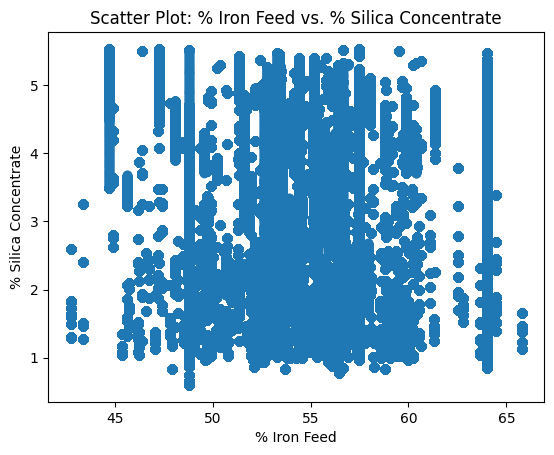

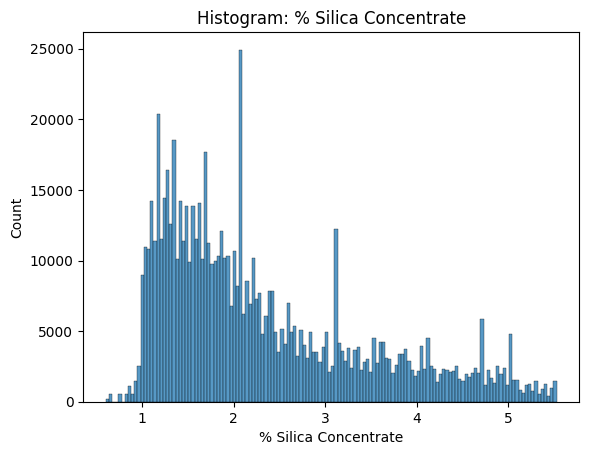

In [42]:
# Scatter plot
plt.scatter(data['% Iron Feed'], data['% Silica Concentrate'])
plt.xlabel('% Iron Feed')
plt.ylabel('% Silica Concentrate')
plt.title('Scatter Plot: % Iron Feed vs. % Silica Concentrate')
plt.show()

# Histogram
sns.histplot(data['% Silica Concentrate'])
plt.xlabel('% Silica Concentrate')
plt.ylabel('Count')
plt.title('Histogram: % Silica Concentrate')
plt.show()


#### Feature Engineering

In [43]:
data['Total Air Flow'] = data[['Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow','Flotation Column 03 Air Flow']].sum(axis=1)

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X  = data.drop(['% Silica Concentrate'], axis=1)
y = data['% Silica Concentrate']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [46]:
r2_score = model.score(X_test, y_test)
print("R-squared score: ", r2_score)

R-squared score:  0.6840329378666726


In [51]:
from sklearn.metrics import mean_squared_error
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("predictions", y_pred)
print("Mean Squared Error: ", mse)

predictions [3.86437736 2.10704437 2.27653243 ... 2.18437135 2.1928691  2.30046741]
Mean Squared Error:  0.39932639607264847


::: callout-caution
 The predicted values are shown as an array `[3.86437736, 2.10704437, 2.27653243, ..., 2.18437135, 2.1928691, 2.30046741].`

The mean squared error (MSE) between the predicted values and the actual values is calculated as `0.39932639607264847`. This metric provides an indication of how well your model's predictions align with the true values. A lower MSE generally indicates better predictive 

:::

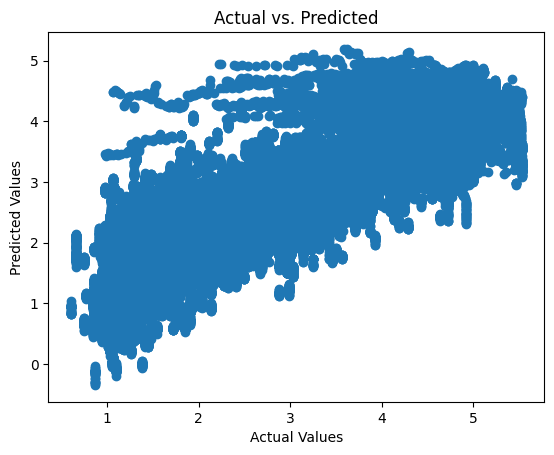

In [53]:
# Plotting the predicted values against the actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted')
plt.show()


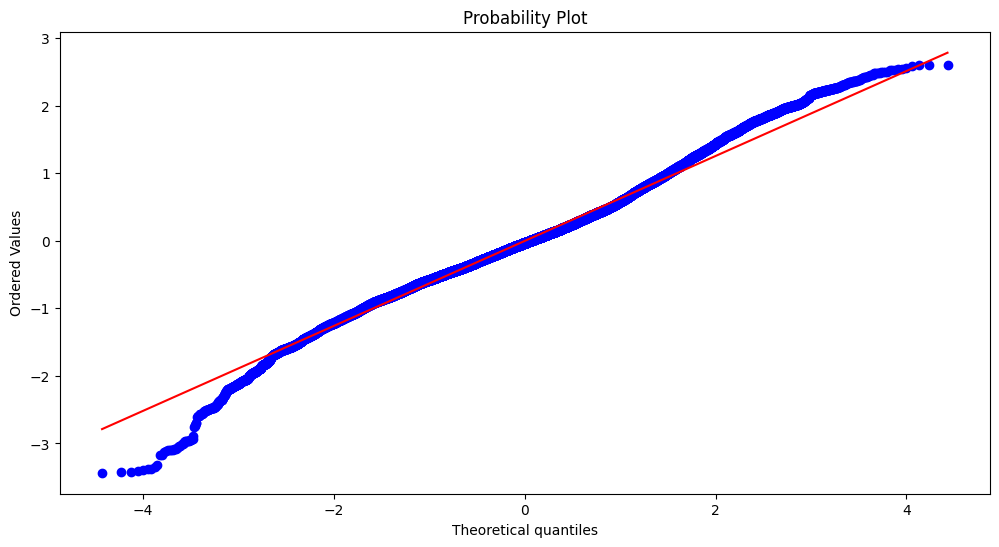

In [62]:
import scipy as sp
fig, ax = plt.subplots(figsize=(12,6), dpi=100)
_ = sp.stats.probplot(residuals, plot=ax)

-0.001576845300393576


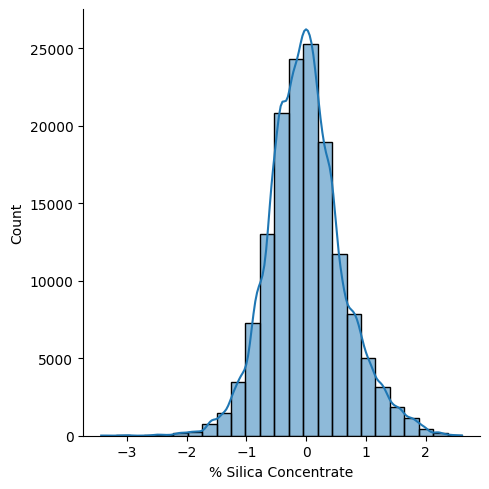

In [63]:
print(residuals.mean())
sns.displot(residuals, bins=25, kde=True);

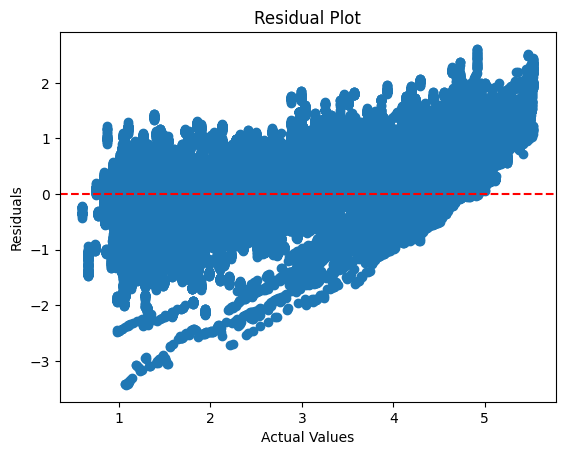

In [54]:
residuals = y_test - y_pred

# Plotting the residuals
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


In [9]:
data.duplicated().sum()

1171

In [45]:
total = data.isnull().sum()
percent = (data.isnull().sum()/data.isnull().count())
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
date,0,0.0
% Iron Feed,0,0.0
% Silica Feed,0,0.0
Starch Flow,0,0.0
Amina Flow,0,0.0
Ore Pulp Flow,0,0.0
Ore Pulp pH,0,0.0
Ore Pulp Density,0,0.0
Flotation Column 01 Air Flow,0,0.0
Flotation Column 02 Air Flow,0,0.0


In [55]:
data = data.loc["2017-03-29 12:00:00":]

In [57]:
print(f"the dataset after clearning has {round(data.shape[0]/7377453 * 100,2)}% of the rows"), data.shape

the dataset after clearning has 7.26% of the rows


(None, (535753, 25))

In [58]:
data.groupby(data.index).count()["% Silica Concentrate"].value_counts()

% Silica Concentrate
1    535753
Name: count, dtype: int64

In [4]:
#| code-fold: true
important_cols =["date", "% Iron Concentrate","% Silica Concentrate","Ore Pulp pH","Flotation Column 05 Level"]

data_june = data[important_cols]
data_june.head()

,date,% Iron Concentrate,% Silica Concentrate,Ore Pulp pH,Flotation Column 05 Level
0,2017-03-10 01:00:00,"66,91","1,31","10,0664","502,255"
1,2017-03-10 01:00:00,"66,91","1,31","10,0672","496,363"
2,2017-03-10 01:00:00,"66,91","1,31","10,068","484,411"
3,2017-03-10 01:00:00,"66,91","1,31","10,0689","471,411"
4,2017-03-10 01:00:00,"66,91","1,31","10,0697","462,598"


In [64]:
import pymc as pm
print(f"running on v{pm.__version__}")

running on v5.4.1


In [70]:
X = data[["% Iron Feed", "% Silica Feed"]].values
y = data["% Silica Concentrate"].values
with pm.Model() as lin_reg:
    β = pm.Normal("β", mu =0, sigma=10, shape=2)
    β_1 = pm.Normal("β_1", mu =0, sigma=10)
    μ = β_1 + pm.math.dot(X, β)
    σ = pm.HalfCauchy("σ", beta=1)
    y_obs = pm.Normal("y_obs", mu=μ, sigma=σ, observed=y)
    trace = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [β, β_1, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 10651 seconds.


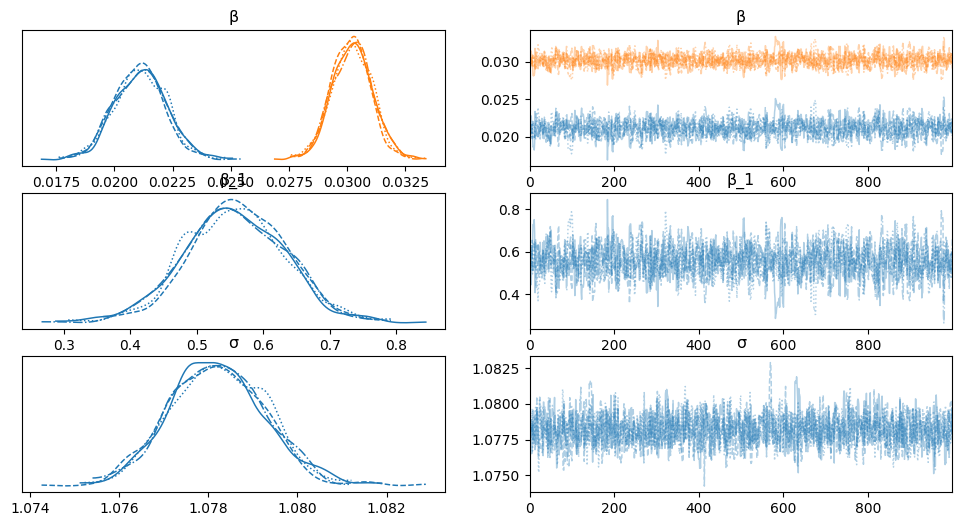

In [72]:
import arviz as az
az.plot_trace(trace);

In [73]:
az.summary(trace, round_to=2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
β[0],0.02,0.00,0.02,0.02,0.0,0.0,1048.76,1068.63,1.0
β[1],0.03,0.00,0.03,0.03,0.0,0.0,1093.56,1157.25,1.0
β_1,0.56,0.07,0.41,0.69,0.0,0.0,1052.96,1080.19,1.0
σ,1.08,0.00,1.08,1.08,0.0,0.0,1590.97,1250.42,1.0


In [78]:
lin_reg = pm.Model()
with lin_reg:
    pm.sample_posterior_predictive(trace, extend_inferencedata=True)

In [81]:
trace.posterior

<xarray.Dataset>
Dimensions:  (chain: 4, draw: 1000, β_dim_0: 2)
Coordinates:
  * chain    (chain) int32 0 1 2 3
  * draw     (draw) int32 0 1 2 3 4 5 6 7 8 ... 992 993 994 995 996 997 998 999
  * β_dim_0  (β_dim_0) int32 0 1
Data variables:
    β        (chain, draw, β_dim_0) float64 0.02075 0.03019 ... 0.01962 0.0291
    β_1      (chain, draw) float64 0.5793 0.5551 0.5205 ... 0.5931 0.5871 0.658
    σ        (chain, draw) float64 1.078 1.078 1.078 1.079 ... 1.08 1.078 1.077
Attributes:
    created_at:                 2023-06-20T10:24:17.307013
    arviz_version:              0.15.1
    inference_library:          pymc
    inference_library_version:  5.4.1
    sampling_time:              10650.831595659256
    tuning_steps:               1000

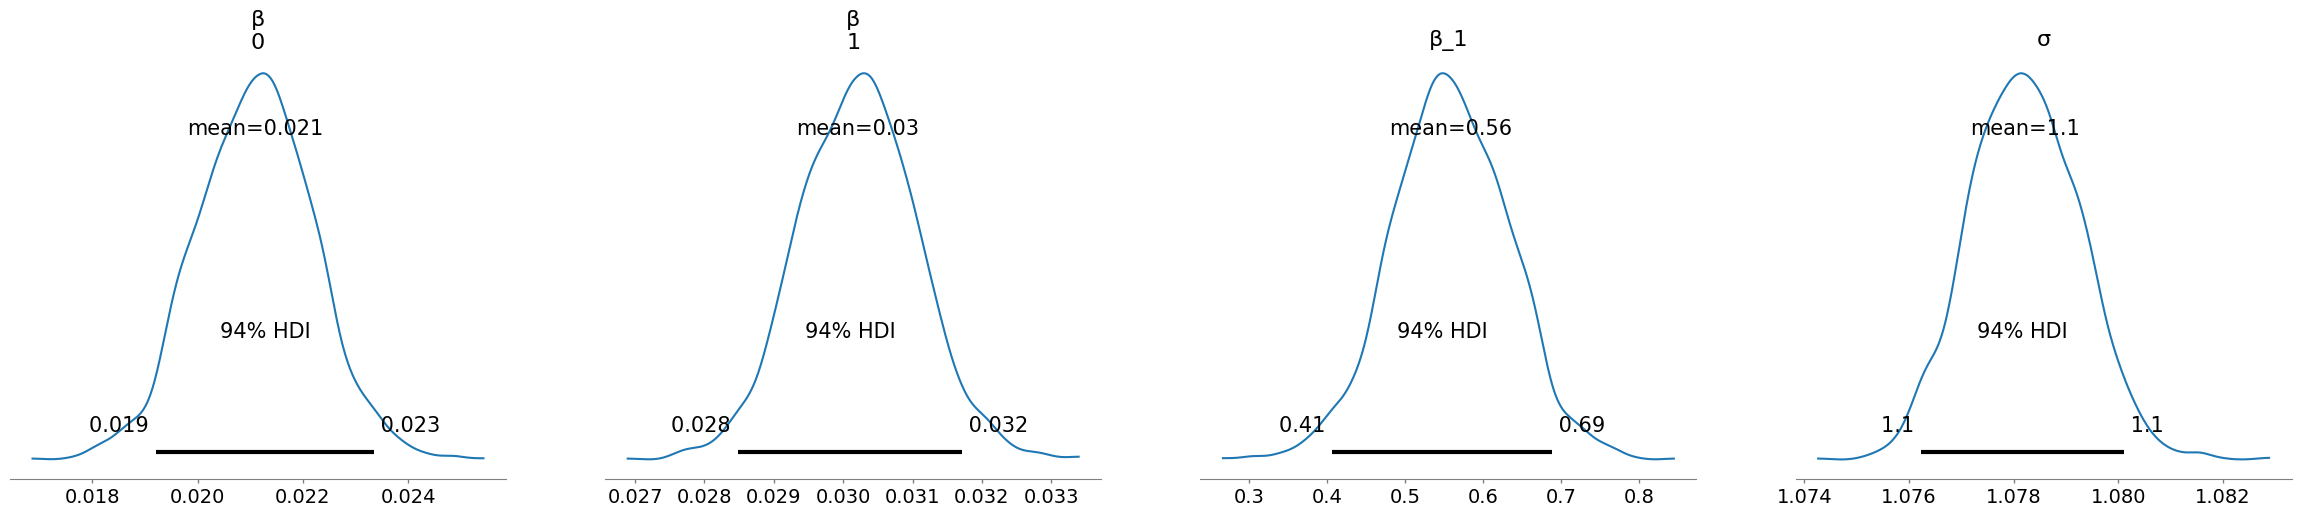

In [83]:
az.plot_posterior(trace);

In [91]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [94]:
# Make predictions on the test set
predictions = rf_model.predict(X_test)
predictions

array([3.53999996, 1.29999995, 2.07999992, ..., 2.26999998, 1.66509997,
       2.0946999 ])

In [93]:
# Evaluate the model's performance
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.0007650769034714806


In [101]:
import joblib

model = joblib.dump(rf_model,"rf_model.pkl")